<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/Lab_Practical_Transpose_Convolution_Answered_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png" width=300 height=300 />


## Lab: Practical Application of Transpose Convolution  

**Estimated time needed: 30 minutes**

This lab will guide you through creating, training, and evaluating models that use transpose convolution layers for tasks such as image reconstruction.

##### Learning objectives:

By the end of this lab, you will:

- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model

- Visualize the results  

##### Prerequisites:

- Basic understanding of Python programming

- Familiarity with convolutional neural network (CNN) concepts

- Keras and TensorFlow installed




#### Steps:
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`.


In [2]:
import warnings
warnings.simplefilter("ignore")

# REMOVE the pip install that caused conflict
# !pip install tensorflow==2.16.1  ← REMOVE THIS LINE

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D

import numpy as np
import matplotlib.pyplot as plt


**Explanation:**

 `tensorflow` is the main library for machine learning in Python.

  `Model, Input, Conv2D, and Conv2DTranspose` are used to create and manipulate the layers in your model.

  `numpy` and `matplotlib` are used for data manipulation and visualization.


**Step 2: Define the Input Layer**

You need to define the input shape for your model. For simplicity, let's assume you are working with an input image of size 28x28 with 1 channel (grayscale).




In [3]:
input_layer = Input(shape=(28, 28, 1))

**Explanation:**

`Input(shape=(28, 28, 1))` creates an input layer that expects 28x28 grayscale images.


**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image.


In [4]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer)


**Explanation:**

`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')` creates a convolution layer with 32 filters.

`Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')` creates a transpose convolution layer for reconstructing the image.

**Step 4: Create the Model**

Now, you will create the model by specifying the input and output layers.


In [5]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Explanation:**

`Model(inputs=input_layer, outputs=transpose_conv_layer)` creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.  

**Step 5: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics.


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Explanation:**

- optimizer=`adam` specifies the Adam optimizer.

- loss=`binary_crossentropy` specifies the binary cross-entropy loss function, suitable for binary pixel classification.  


**Step 6: Train the Model**

You can now train the model on some training data. For this example, let's assume X_train is our training input data.


In [7]:
# Generate synthetic training data

X_train = np.random.rand(1000, 28, 28, 1)

y_train = X_train # For reconstruction, the target is the input

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0752 - val_loss: 0.0589
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0526 - val_loss: 0.0336
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0286 - val_loss: 0.0165
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - val_loss: 0.0081
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0019 - val_loss: 0.0018


**Explanation:**

- X_train is a placeholder for your actual training data.

- y_train is the same as X_train for image reconstruction.

- model.fit trains the model for a specified number of epochs and batch size.

  
**Step 7: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs.


In [8]:
 # Generate synthetic test data

X_test = np.random.rand(200, 28, 28, 1)

y_test = X_test

loss = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 
Test loss: 0.0017942963168025017


**Explanation:**

`X_test` and `y_test` are placeholders for your actual test data.

`model.evaluate` computes the loss of the model on test data. .

**Step 8: Visualize the Results**

To better understand the model's performance, let's visualize some reconstructed images.  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


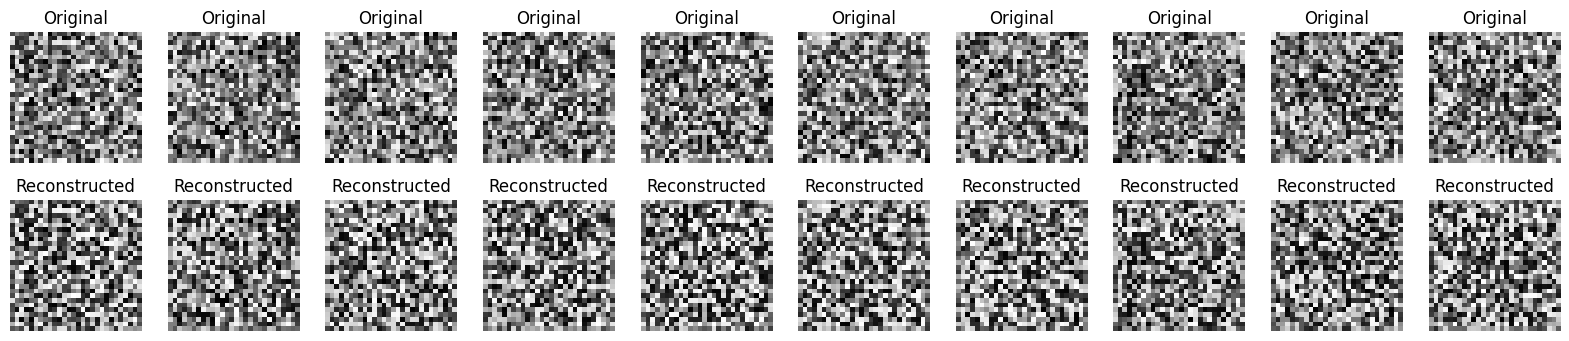

In [9]:
# Predict on test data
y_pred = model.predict(X_test)

# Plot some sample images

n = 10 # Number of samples to display

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

**Explanation:**

`model.predict` generates predictions for the test data.

`plt.imshow` visualizes the original and reconstructed images side by side for comparison.


### Practice exercises


#### Exercise 1: Experiment with Different Kernel Sizes

**Objective:** Understand the impact of different kernel sizes on the model's performance.

**Instructions:**
1. Modify the kernel size of the `Conv2D` and `Conv2DTranspose` layers.
2. Recompile, train, and evaluate the model.
3. Observe and record the differences in performance.


In [10]:
# Write your code here
# Exercise 1: Experiment with Different Kernel Sizes
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(16, (5, 5), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 16)     │         6,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,233 (28.25 KB)

 Trainable params: 7,233 (28.25 KB)

 Non-trainable params: 0 (0.00 B)

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


In [11]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0753 - val_loss: 0.0448
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0362 - val_loss: 0.0157
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0124 - val_loss: 0.0061
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 0.0023
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Test loss: 0.0023123519495129585


#### Exercise 2: Add Dropout Layers

**Objective:** Add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after the convolutional layer.
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [12]:
# Write your code here
# Exercise 2: Add Dropout Layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


In [13]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0776 - val_loss: 0.0581
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0538 - val_loss: 0.0351
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0344 - val_loss: 0.0201
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0226 - val_loss: 0.0115
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0157 - val_loss: 0.0066
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0117 - val_loss: 0.0047
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0097 - val_loss: 0.0037
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - val_loss: 0.0031
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0080 - val_loss: 0.0027
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0075 - val_loss: 0.0025
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 
Test loss: 0.0024824547581374645


#### Exercise 3: Use Different Activation Functions

**Objective:** Experiment with different activation functions and observe their impact on model performance.

**Instructions:**
1. Change the activation function of the convolutional and transpose convolutional layers to `tanh`.
2. Recompile, train, and evaluate the model.


In [14]:
# Write your code here
# Exercise 3: Use Different Activation Functions
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=2, padding='same', activation='tanh'),
    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

<details>
<summary>Click here for solution</summary> </br>

```python

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')



In [15]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1825 - val_loss: 0.0694
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0553 - val_loss: 0.0298
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0248 - val_loss: 0.0137
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0039 - val_loss: 0.0038
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 
Test loss: 0.0038077551871538162


### Conclusion:

By completing this lab, you have successfully created, trained, and evaluated a simple neural network model using transpose convolution for image reconstruction. This exercise provided hands-on experience with Keras and practical applications of transpose convolution layers. Continue experimenting with different architectures and datasets to deepen your understanding and skills in deep learning with Keras.


Copyright © IBM Corporation. All rights reserved.
